In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/Hallshit/Documents/cryptoAPI/venv/lib/python3.5/site-packages")
from historical_data_Binance import historical_data
from binance.client import Client
import datetime

## Thesis: 
Seeing that the cryptocurrency market has been dead lately I thought this would be a good time for mean reversion trading strategies.  The following strategy checks for above normal percent change in a certain time period and places a short position.

In [76]:

client = Client(api_key, api_secret)
cryptos = client.get_all_tickers()


In [77]:

cData = []
for c in cryptos:
    cData.append(historical_data(c['symbol'], 365, "Client.KLINE_INTERVAL_1DAY"))
    
df = pd.concat(cData)

## Daily pricing data consisting of every crypto sold on Binance

In [78]:
df.head()

,Open,High,Low,Close,Volume,CTime,Quote Asset Volume,# of Trades,Taker buy base asset volume,Taker buy quote asset volume,ignored,CryptoName
OTime,,,,,,,,,,,,
2017-07-22,0.08158600,0.084733,0.079856,0.082474,7979.899,2017-07-22 23:59:59.999,651.60703581,8841,4460.35800000,364.37225928,22661.58158102,ETHBTC
2017-07-23,0.08231200,0.084560,0.081417,0.083533,6340.799,2017-07-23 23:59:59.999,527.55598124,7032,3714.15200000,309.05616001,22494.29294971,ETHBTC
2017-07-24,0.08343800,0.083973,0.082265,0.083161,7380.244,2017-07-24 23:59:59.999,612.72702417,8346,3931.11600000,326.44455142,22474.16443102,ETHBTC
2017-07-25,0.08314900,0.083149,0.075482,0.079654,7845.032,2017-07-25 23:59:59.999,634.98369428,8099,4588.86500000,371.28600482,22508.98528992,ETHBTC
2017-07-26,0.07967600,0.081172,0.077610,0.079892,7496.738,2017-07-26 23:59:59.999,599.43177658,8700,4326.59700000,345.79967266,25796.90357168,ETHBTC


# Backtest

In [79]:
# Takes every crypto and gets the nth day percent change in the close price
df['lastNdaysReturn'] = df.groupby('CryptoName')[["CryptoName", 'Close']].pct_change(7)

In [80]:
# Takes every crypto and gives us the future returns for backtesting
df['nextDayReturn'] = df.groupby("CryptoName")[["CryptoName", "Close"]].pct_change().shift(-1)

In [81]:
# Gives us the nth top percentile of the historical returns
# This helps us determine if the the return is above normal. Odds are that the price should drop
top_percentile = df.groupby("CryptoName")[["CryptoName", 'lastNdaysReturn']].quantile(.97) 
top_percentile.head()

0.97,lastNdaysReturn
CryptoName,
ADABNB,0.286517
ADABTC,1.537157
ADAETH,2.240794
ADAUSDT,204.474535
ADXBNB,0.993553


In [82]:
# Next we merge all the top percentiles to the original data table.
df1 = df.merge(top_percentile, on="CryptoName")
df1.rename(columns={"lastNdaysReturn_y": "top_percentile"})

,Open,High,Low,Close,Volume,CTime,Quote Asset Volume,# of Trades,Taker buy base asset volume,Taker buy quote asset volume,ignored,CryptoName,lastNdaysReturn_x,nextDayReturn,top_percentile
0,0.08158600,8.473300e-02,7.985600e-02,8.247400e-02,7.979899e+03,2017-07-22 23:59:59.999,651.60703581,8841,4460.35800000,364.37225928,22661.58158102,ETHBTC,NaN,0.012840,0.345156
1,0.08231200,8.456000e-02,8.141700e-02,8.353300e-02,6.340799e+03,2017-07-23 23:59:59.999,527.55598124,7032,3714.15200000,309.05616001,22494.29294971,ETHBTC,NaN,-0.004453,0.345156
2,0.08343800,8.397300e-02,8.226500e-02,8.316100e-02,7.380244e+03,2017-07-24 23:59:59.999,612.72702417,8346,3931.11600000,326.44455142,22474.16443102,ETHBTC,NaN,-0.042171,0.345156
3,0.08314900,8.314900e-02,7.548200e-02,7.965400e-02,7.845032e+03,2017-07-25 23:59:59.999,634.98369428,8099,4588.86500000,371.28600482,22508.98528992,ETHBTC,NaN,0.002988,0.345156
4,0.07967600,8.117200e-02,7.761000e-02,7.989200e-02,7.496738e+03,2017-07-26 23:59:59.999,599.43177658,8700,4326.59700000,345.79967266,25796.90357168,ETHBTC,NaN,-0.030579,0.345156
5,0.07981500,8.186700e-02,7.705900e-02,7.744900e-02,8.311206e+03,2017-07-27 23:59:59.999,667.17746185,9001,4442.54300000,356.68582013,25618.59992375,ETHBTC,NaN,-0.111648,0.345156
6,0.07705900,7.785900e-02,6.682700e-02,6.880200e-02,1.101382e+04,2017-07-28 23:59:59.999,790.35738935,11121,5919.01600000,425.02549738,25589.59179554,ETHBTC,NaN,0.101320,0.345156
7,0.06879700,7.681400e-02,6.433500e-02,7.577300e-02,1.430537e+04,2017-07-29 23:59:59.999,982.45449195,13734,7259.96600000,498.44887227,25845.85312057,ETHBTC,-0.081250,-0.074750,0.345156
8,0.07600900,7.668400e-02,6.987600e-02,7.010900e-02,1.298976e+04,2017-07-30 23:59:59.999,952.07968700,13038,6641.97700000,486.80260453,25973.49745228,ETHBTC,-0.160703,0.033876,0.345156
9,0.07040600,7.334100e-02,6.759000e-02,7.248400e-02,1.202945e+04,2017-07-31 23:59:59.999,857.24421228,12674,6058.30400000,431.74541787,25543.75751672,ETHBTC,-0.128390,0.152917,0.345156


In [83]:
df1 = df1.rename(columns={"lastNdaysReturn_y": "top_percentile"})

In [84]:
# Lets remove unecessary columns
df2 = df1[["CTime",'lastNdaysReturn_x', "top_percentile", "CryptoName", "nextDayReturn"]]

In [85]:
df2.head()

,CTime,lastNdaysReturn_x,top_percentile,CryptoName,nextDayReturn
0,2017-07-22 23:59:59.999,NaN,0.345156,ETHBTC,0.012840
1,2017-07-23 23:59:59.999,NaN,0.345156,ETHBTC,-0.004453
2,2017-07-24 23:59:59.999,NaN,0.345156,ETHBTC,-0.042171
3,2017-07-25 23:59:59.999,NaN,0.345156,ETHBTC,0.002988
4,2017-07-26 23:59:59.999,NaN,0.345156,ETHBTC,-0.030579


In [86]:
# Inputs a short position (-1) in rows where the last weeks return is greater than the top percentile of returns
df2['position'] = np.where(df2['lastNdaysReturn_x'] > df2['top_percentile'], -1, 0) 

/Users/Hallshit/newdir/M3digreen/M3digr33n/WMScraper/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
# Calculate strategy returns by multiplying our current position by the next day return
df2['P/L'] = df2['position'] * df2['nextDayReturn']

/Users/Hallshit/newdir/M3digreen/M3digr33n/WMScraper/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
# Our daily returns are calculated by grouping all the returns by day and taking the average
strat_returns = df2.groupby("CTime")['P/L'].mean().to_frame()

In [89]:
# Place a stop where if price drops by .05 sell.  Note: This may bring down overall return
strat_returns['P/L'].loc[strat_returns['P/L'] < -.05]  = -.05
# Calculate the day after day cumulative returns
strat_returns['cum_prod'] = (1 + strat_returns['P/L']).cumprod() -1

In [90]:
strat_returns.tail()


,strategy,cum_prod
CTime,,
2018-07-17 23:59:59.999,0.000199,-0.085530
2018-07-18 23:59:59.999,0.000734,-0.084859
2018-07-19 23:59:59.999,0.000746,-0.084176
2018-07-20 23:59:59.999,0.000000,-0.084176
2018-07-21 23:59:59.999,-0.035547,-0.116731


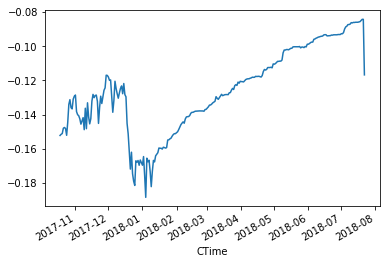

In [91]:
# Plot the cumulative returns
strat_returns['cum_prod'].iloc[90:].plot()

In [92]:
sharpe = strat_returns['P/L'].mean() / strat_returns['P/L'].std()
sharpe

-0.027011568445828898

# Trade Identifier

In [93]:
most_recent = df1.loc[df.index > datetime.datetime.today() - datetime.timedelta(days=1)]
most_recent

,Open,High,Low,Close,Volume,CTime,Quote Asset Volume,# of Trades,Taker buy base asset volume,Taker buy quote asset volume,ignored,CryptoName,lastNdaysReturn_x,nextDayReturn,top_percentile
364,0.06120400,6.326600e-02,6.089500e-02,6.304000e-02,6.741375e+04,2018-07-21 23:59:59.999,4210.10357018,85940,37786.15500000,2360.56494173,0,ETHBTC,-0.090607,-0.738166,0.345156
729,0.01116000,1.145600e-02,1.093700e-02,1.142600e-02,8.782687e+04,2018-07-21 23:59:59.999,983.70289975,20528,47977.93000000,537.66589970,0,LTCBTC,-0.062521,-0.996343,0.329672
1094,0.00164760,1.659800e-03,1.630400e-03,1.644900e-03,3.334375e+05,2018-07-21 23:59:59.999,548.38380000,42972,174808.38000000,287.67697696,0,BNBBTC,-0.146260,0.899204,1.621758
1459,0.00451700,4.720000e-03,4.414000e-03,4.692000e-03,2.286085e+05,2018-07-21 23:59:59.999,1032.69200926,28104,123987.27000000,559.61714230,0,NEOBTC,-0.094558,5.321824,0.849622
1819,0.01718700,1.726700e-02,1.669200e-02,1.686200e-02,1.666490e+04,2018-07-21 23:59:59.999,281.89118478,1495,6257.84000000,105.93961695,0,QTUMETH,-0.044213,-0.443898,0.810432
2179,0.01747400,1.755000e-02,1.701300e-02,1.742700e-02,2.187314e+05,2018-07-21 23:59:59.999,3769.73395526,7979,119349.62000000,2057.21748312,0,EOSETH,0.091302,-0.983807,0.539333
2539,0.00015993,1.602900e-04,1.521900e-04,1.572800e-04,6.666070e+05,2018-07-21 23:59:59.999,103.89897878,818,275088.00000000,43.07375240,0,SNTETH,0.038906,62.828840,0.985165
2899,0.00486300,4.870000e-03,4.750000e-03,4.802000e-03,1.396596e+04,2018-07-21 23:59:59.999,66.88720904,308,4293.64000000,20.70723493,0,BNTETH,-0.010305,46.896710,0.180670
3253,0.10424900,1.071440e-01,1.022000e-01,1.069450e-01,1.390924e+04,2018-07-21 23:59:59.999,1463.46156859,15654,8076.64900000,849.54514460,0,BCCBTC,-0.045347,-0.974286,2.258560
3602,0.00145100,1.524000e-03,1.405000e-03,1.491000e-03,4.423445e+04,2018-07-21 23:59:59.999,63.75628442,4513,26433.98000000,38.13317741,0,GASBTC,-0.117229,-0.412475,0.769354


In [94]:
most_recent.loc[most_recent['lastNdaysReturn_x'] > most_recent['top_percentile']]

,Open,High,Low,Close,Volume,CTime,Quote Asset Volume,# of Trades,Taker buy base asset volume,Taker buy quote asset volume,ignored,CryptoName,lastNdaysReturn_x,nextDayReturn,top_percentile
71890,0.00380100,0.003993,0.003582,0.003831,31473.426,2018-07-21 23:59:59.999,116.84353423,7783,15665.13100000,58.30882988,0,ZENBTC,0.235408,13.22344,0.218371


In [95]:
# May recommend newly added coins

# Big Sell and Pump Backtest
## This is the same process as before only reversed

In [96]:
sdf = df
sdf['lastNdaysReturn'] = df.groupby('CryptoName')[["CryptoName", 'Close']].pct_change(7)
sdf.head()

,Open,High,Low,Close,Volume,CTime,Quote Asset Volume,# of Trades,Taker buy base asset volume,Taker buy quote asset volume,ignored,CryptoName,lastNdaysReturn,nextDayReturn
OTime,,,,,,,,,,,,,,
2017-07-22,0.08158600,0.084733,0.079856,0.082474,7979.899,2017-07-22 23:59:59.999,651.60703581,8841,4460.35800000,364.37225928,22661.58158102,ETHBTC,NaN,0.012840
2017-07-23,0.08231200,0.084560,0.081417,0.083533,6340.799,2017-07-23 23:59:59.999,527.55598124,7032,3714.15200000,309.05616001,22494.29294971,ETHBTC,NaN,-0.004453
2017-07-24,0.08343800,0.083973,0.082265,0.083161,7380.244,2017-07-24 23:59:59.999,612.72702417,8346,3931.11600000,326.44455142,22474.16443102,ETHBTC,NaN,-0.042171
2017-07-25,0.08314900,0.083149,0.075482,0.079654,7845.032,2017-07-25 23:59:59.999,634.98369428,8099,4588.86500000,371.28600482,22508.98528992,ETHBTC,NaN,0.002988
2017-07-26,0.07967600,0.081172,0.077610,0.079892,7496.738,2017-07-26 23:59:59.999,599.43177658,8700,4326.59700000,345.79967266,25796.90357168,ETHBTC,NaN,-0.030579


In [97]:
bottom_percentile = df.groupby("CryptoName")[["CryptoName", 'lastNdaysReturn']].quantile(.10)

In [98]:
sdf = sdf.merge(bottom_percentile, on="CryptoName")
sdf = sdf.rename(columns={"lastNdaysReturn_y": "bottom_percentile"})

In [99]:
sdf2 = sdf[["CTime",'lastNdaysReturn_x', "bottom_percentile", "CryptoName", "nextDayReturn"]]
sdf2.head()

,CTime,lastNdaysReturn_x,bottom_percentile,CryptoName,nextDayReturn
0,2017-07-22 23:59:59.999,NaN,-0.146425,ETHBTC,0.012840
1,2017-07-23 23:59:59.999,NaN,-0.146425,ETHBTC,-0.004453
2,2017-07-24 23:59:59.999,NaN,-0.146425,ETHBTC,-0.042171
3,2017-07-25 23:59:59.999,NaN,-0.146425,ETHBTC,0.002988
4,2017-07-26 23:59:59.999,NaN,-0.146425,ETHBTC,-0.030579


In [100]:
sdf2['position'] = np.where(sdf2['lastNdaysReturn_x'] < sdf2['bottom_percentile'], 1, 0)

/Users/Hallshit/newdir/M3digreen/M3digr33n/WMScraper/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
sdf2['P/L'] = sdf2['position'] * sdf2['nextDayReturn'] 

/Users/Hallshit/newdir/M3digreen/M3digr33n/WMScraper/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
sdf2.head()

,CTime,lastNdaysReturn_x,bottom_percentile,CryptoName,nextDayReturn,position,strategy
0,2017-07-22 23:59:59.999,NaN,-0.146425,ETHBTC,0.012840,0,0.0
1,2017-07-23 23:59:59.999,NaN,-0.146425,ETHBTC,-0.004453,0,-0.0
2,2017-07-24 23:59:59.999,NaN,-0.146425,ETHBTC,-0.042171,0,-0.0
3,2017-07-25 23:59:59.999,NaN,-0.146425,ETHBTC,0.002988,0,0.0
4,2017-07-26 23:59:59.999,NaN,-0.146425,ETHBTC,-0.030579,0,-0.0


In [103]:
strat_returns2 = sdf2.groupby("CTime")['P/L'].mean().to_frame()

In [104]:
strat_returns2['P/L'].loc[strat_returns['P/L'] < -.10]  = -.10
strat_returns2['cum_prod'] = (1 + strat_returns['P/L']).cumprod() -1

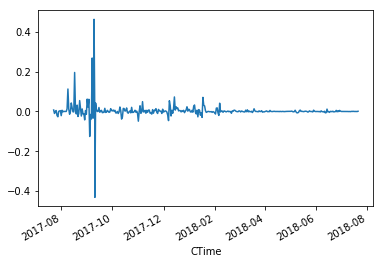

In [105]:
strat_returns2.iloc[:-1]['P/L'].plot()

(185, 2)

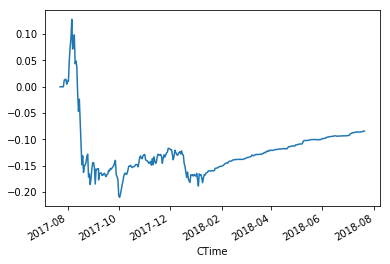

In [106]:
strat_returns2.iloc[:-1]['cum_prod'].plot()
strat_returns2.loc[strat_returns2['P/L'] > 0].shape